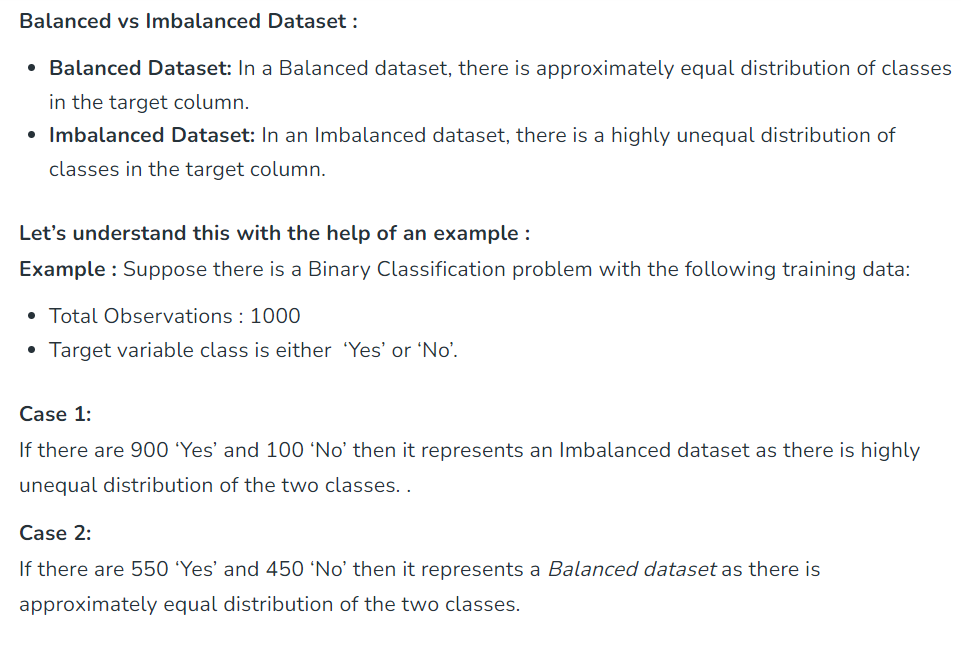

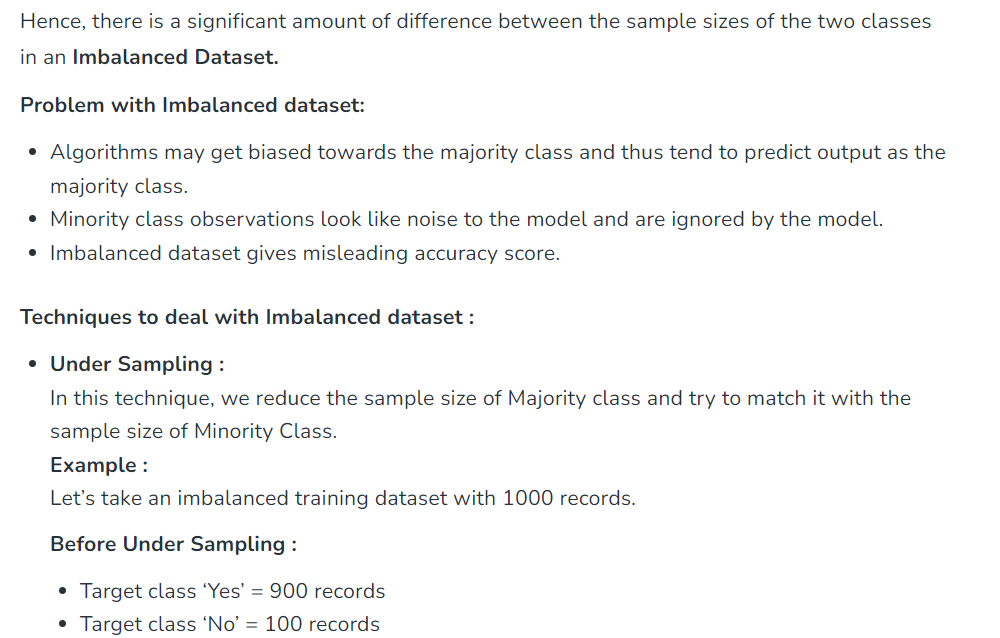

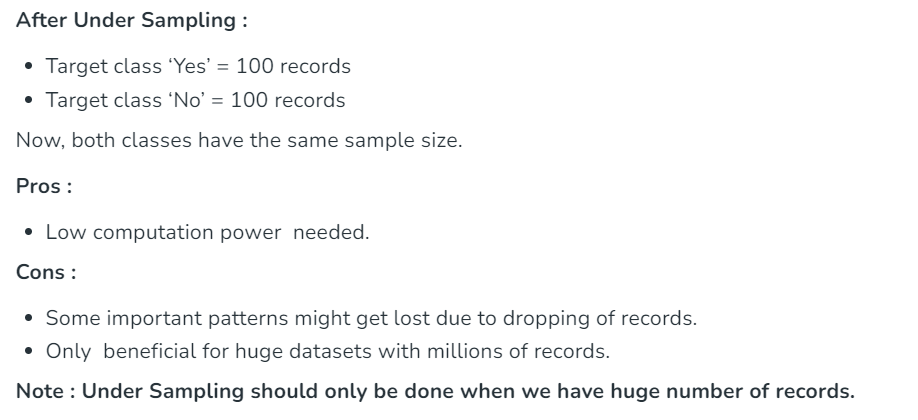

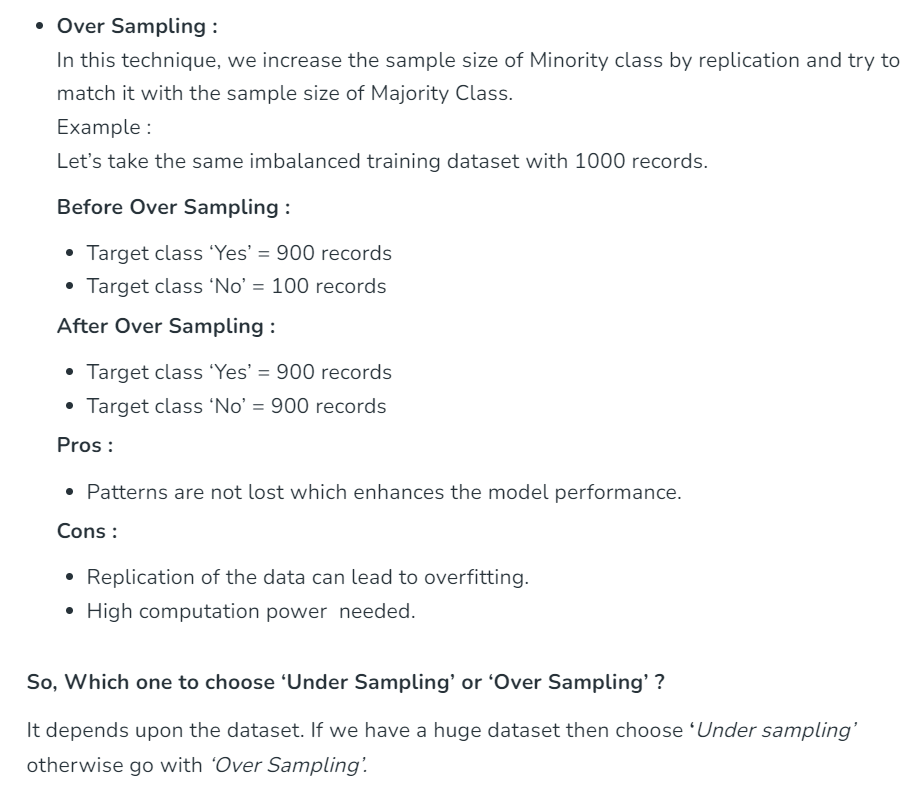

In [3]:
import numpy as np
import pandas as pd

# 1000 DATASET CREATION

In [6]:
# Set the random seed for reproductibilty ie. generate same random numbers again and again
# and simplified algorithm testing process.
np.random.seed(123)

In [7]:
# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [8]:
n_class_0,n_class_1

(900, 100)

In [9]:
class_0 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'Feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target'    : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'Feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target'    : [1] * n_class_1
})

In [10]:
df = pd.concat([class_0,class_1])

In [11]:
df.head()

,Feature_1,Feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [16]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [15]:
df

,index,Feature_1,Feature_2,target
0,0,-1.085631,0.551302,0
1,1,0.997345,0.419589,0
2,2,0.282978,1.815652,0
3,3,-1.506295,-0.252750,0
4,4,-0.578600,-0.292004,0
...,...,...,...,...
995,95,1.376371,2.845701,1
996,96,2.239810,0.880077,1
997,97,1.131760,1.640703,1
998,98,2.902006,0.390305,1


In [17]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

# UPSAMPLING

In [18]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [20]:
df_minority.head()

,Feature_1,Feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [22]:
df_majority.head()

,Feature_1,Feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [23]:
# Upsampling Perform

from sklearn.utils import resample

In [30]:
df_minority_upsample = resample(
    df_minority,
    replace = True, # Sample with Replacement 
    n_samples = len(df_majority), # To match the Minority class
    random_state = 42
)

In [31]:
df_minority_upsample.shape

(900, 3)

In [32]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [33]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [34]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [35]:
df_upsampled.shape

(1800, 3)

# DOWNSAMPLING

In [42]:
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [43]:
class_0 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'Feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'target'    : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'Feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),
    'target'    : [1] * n_class_1
})

In [44]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [45]:
df_majority_downsample = resample(
    df_majority,
    replace = False, # Sample without Replacement 
    n_samples = len(df_minority), # To match the Minority class
    random_state = 42
)

In [46]:
df_majority_downsample.shape

(100, 3)

In [47]:
df_majority_downsample['target'].value_counts()

0    100
Name: target, dtype: int64

In [48]:
df_downsample = pd.concat([df_minority,df_majority_downsample])

In [ ]:
df_downsample['target'].valu